In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [81]:
data = pd.read_csv('IMDb Movies India.csv',encoding='latin-1') #upload the dataset

In [82]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [83]:
data.shape

(15509, 10)

In [84]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [85]:
data.dropna(inplace=True) #dropping records with null values

In [86]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [87]:
data.shape

(5659, 10)

In [88]:
data.duplicated().sum()

0

In [89]:
# Convert 'Duration' column to numeric values by removing the min word
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''))

In [90]:
# Convert 'Votes' to numeric by removing ,
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''))

In [91]:
#  Convert 'Year' to numeric by removing barckets
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [92]:
# Splitting the genre by, to keep only unique genres and replacing the null values with mode
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')

In [93]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,Romance,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,2005,142,War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


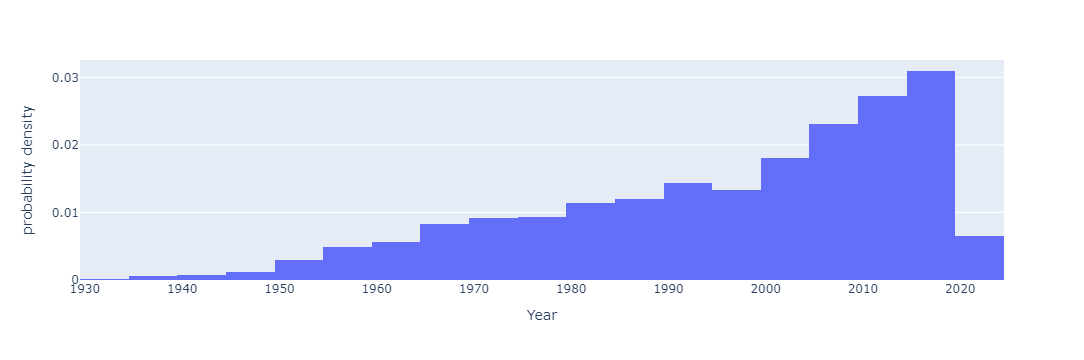

In [97]:
#Here we have created a histogram over the years in the data
year = px.histogram(data, x = 'Year', histnorm='probability density', nbins = 30)
year.show()

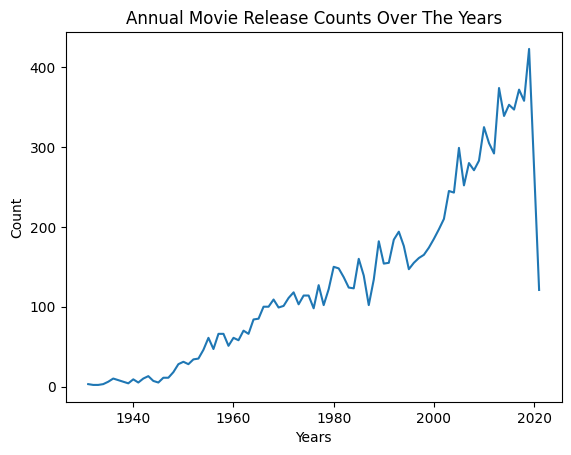

In [105]:
ax = sb.lineplot(data=data['Year'].value_counts().sort_index())
darkgrid_positions = range(min(data['Year']), max(data['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over The Years")
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

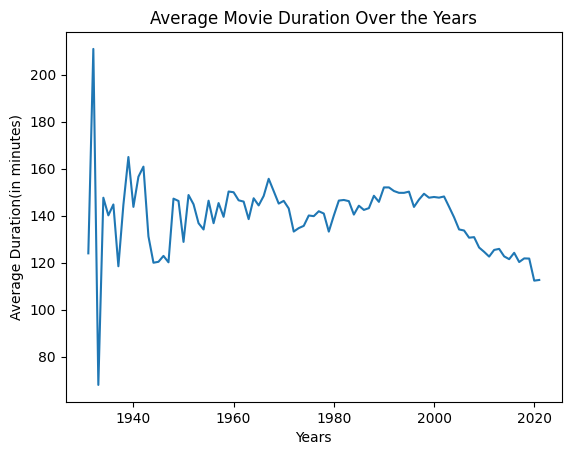

In [107]:
ax = sb.lineplot(data=data.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
darkgrid_positions = range(min(data['Year']), max(data['Year']) + 1, 5)
ax.set_title("Average Movie Duration Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

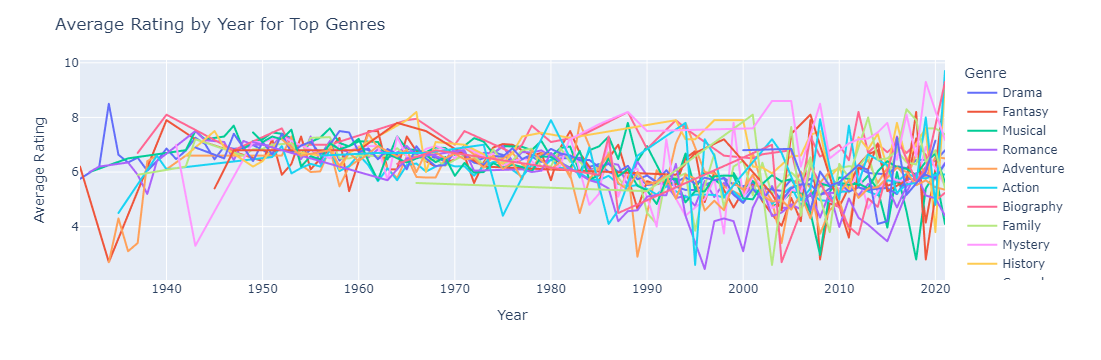

In [113]:
# Group data by Year and calculate the average rating
avg_rating_by_year = data.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

graph = px.line(avg_rating_by_year, x='Year', y='Rating', color = "Genre")
graph.update_layout(title='Average Rating by Year for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')
graph.show()

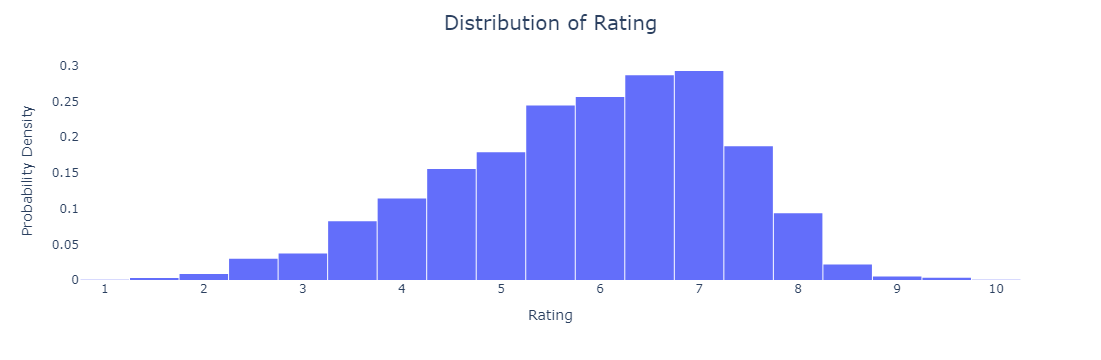

In [114]:
rating = px.histogram(data, x = 'Rating', histnorm='probability density', nbins = 40)
rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
rating.show()

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [117]:
# Dropping Name column because it doesn't affect the rating
data.drop('Name', axis = 1, inplace = True)

In [119]:
#feature engineering
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

In [120]:
data.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.056744,7.000000,6.850000,7.000000,7.000000
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.751042,4.400000,5.250000,4.400000,4.460000
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.811087,4.400000,5.250000,4.400000,4.460000
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.751042,5.335135,4.793617,5.730000,5.930000
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.056744,5.335135,4.793617,5.730000,5.930000
5,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.246845,5.335135,4.793617,5.730000,5.930000
6,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.056744,7.407143,5.456863,6.828571,6.671429
6,2005,142,Romance,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.811087,7.407143,5.456863,6.828571,6.671429
6,2005,142,War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.981818,7.407143,5.456863,6.828571,6.671429
8,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,4.817327,5.600000,5.600000,5.812500,5.600000


In [122]:
Input = data.drop(['Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output = data['Rating']

In [123]:
Input.head(5)

,Year,Duration,Votes,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109,8,6.056744,7.000000,6.850000,7.00,7.00
3,2019,110,35,5.751042,4.400000,5.250000,4.40,4.46
3,2019,110,35,5.811087,4.400000,5.250000,4.40,4.46
5,1997,147,827,5.751042,5.335135,4.793617,5.73,5.93
5,1997,147,827,6.056744,5.335135,4.793617,5.73,5.93


In [124]:
Output.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [136]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
prediction = lr.predict(xtest)

In [148]:
print('Performance of Linear Regression', '\n')
print('Mean squared error: ',mean_squared_error(ytest, prediction))
print('Mean absolute error: ',mean_absolute_error(ytest, prediction))
print('R2 Score : ',r2_score(ytest, prediction))

Performance of Linear Regression 

Mean squared error:  0.45998421197094147
Mean absolute error:  0.5013418419240965
R2 Score :  0.7603086070423833


In [146]:
# New data with values for testing
tester = {'Year': [2015], 'Duration': [108], 'Votes': [29], 'Genre_mean_rating': [4.7], 'Director_encoded': [4.1], 'Actor1_encoded': [5.5], 'Actor2_encoded': [4.3], 'Actor3_encoded': [5.9]}
test1 = pd.DataFrame(tester)

In [147]:
# Predict the movie rating for the test1 data
test_rating = lr.predict(test1)
print("Predicted Rating for test1 : " , test_rating[0])

Predicted Rating for test1 :  4.461701290955807
